In [177]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [178]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### features ("X") and labels ("Y") extractions

In [179]:
X = np.array(df.iloc[:,2:4])
Y = np.array(df.iloc[:, 4])

Text(0,0.5,'EstimatedSalary')

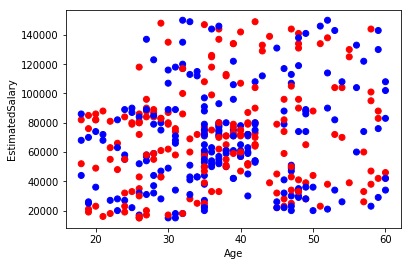

In [180]:
#plotting the data
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=["r","b"])
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")

In [181]:
import sklearn
from sklearn.preprocessing import StandardScaler             #features scaling
sc = StandardScaler()
from sklearn.model_selection import train_test_split

### Splitting data into training and test set and feature scaling using "Standardscaler"

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8  )
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [183]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [184]:
pred = model.predict(X_test)
accuracy = np.mean(pred==Y_test)

In [185]:
from sklearn.metrics import confusion_matrix, f1_score
print("confusion matrix:\n", confusion_matrix(Y_test, pred))
print("F1 Score: " , round(f1_score(Y_test, pred)*100, 2), "%")

confusion matrix:
 [[43  5]
 [ 7 25]]
F1 Score:  80.65 %
